#**Classificação de amostras de vinho** <br>


<b>Resumo:</b>

O objetivo analisar os atributos álcool e ash <br>

<b>Data set URL : </b>

https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset


<b>Descrição:</b>

Este projeto é realizado para  a disciplina Tópicos Especiais em Computação I (Introdução à Ciência de Dados).

<b>Número de Instâncias:</b>

178

<b>Atributos:</b>
<li>Álcool Ácido málico Cinza Alcalinidade de cinzas Magnésio Fenóis totais Flavonóides Fenóis não flavonóides Proantocianinas Intensidade da cor Matiz OD280/OD315 de vinhos diluídos Prolina.




## <b>Importando Bibliotecas

In [ ]:
import pandas as pd               
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.stats.mstats import gmean,hmean
from scipy import stats
import math
from scipy.stats import kurtosis, skew
%matplotlib inline

## <b>Carregando a Base de Dados


In [ ]:
# carregando dataset Wine
from sklearn.datasets import load_wine
dataWine = load_wine()


In [ ]:
print(dataWine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Os 178 pontos de dados em cada um dos 13 grupos de dados, formatados como uma matriz de 150x13

In [ ]:
print(dataWine['data'][:2])


[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]]


Em qual grupo cada ponto de dados está (0, 1 ou 2)

In [ ]:
print(dataWine['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


 Convertendo dados em um quadro de dados

In [ ]:
data = pd.DataFrame(dataWine['data'], columns=dataWine['feature_names'])

In [ ]:
target = pd.DataFrame(dataWine['target'], columns=['cultivator'])

In [ ]:
df = pd.concat([target, data], axis='columns')

# **Exploração de dados**

Plot

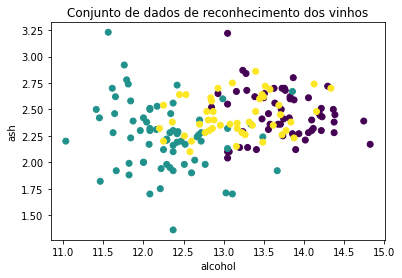

In [ ]:
plt.scatter(df['alcohol'], df['ash'], c=df['cultivator'])
plt.title('Conjunto de dados de reconhecimento dos vinhos')
plt.xlabel('alcohol')
plt.ylabel('ash')
plt.show()

In [ ]:
df.head(10)

,cultivator,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,0,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,0,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,0,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,0,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,0,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cultivator                    178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    float64
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cultivator                    178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    float64
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  178 non-null    float64
 13  proli

In [ ]:
df.describe

<bound method NDFrame.describe of      cultivator  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0             0    14.23        1.71  2.43               15.6      127.0   
1             0    13.20        1.78  2.14               11.2      100.0   
2             0    13.16        2.36  2.67               18.6      101.0   
3             0    14.37        1.95  2.50               16.8      113.0   
4             0    13.24        2.59  2.87               21.0      118.0   
..          ...      ...         ...   ...                ...        ...   
173           2    13.71        5.65  2.45               20.5       95.0   
174           2    13.40        3.91  2.48               23.0      102.0   
175           2    13.27        4.28  2.26               20.0      120.0   
176           2    13.17        2.59  2.37               20.0      120.0   
177           2    14.13        4.10  2.74               24.5       96.0   

     total_phenols  flavanoids  nonflavanoid_phenols 

## <b>Verificar Valores nulos

In [ ]:
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Esta função conta as colunas que contêm valor nulo, mas aqui parece que os dados são pré-processados ​​e limpos com valores nulos.

## **Informações estatísticas para conjunto de dados**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


<li> O resumo do conjunto de dados dataWine = data parece correto, no primeiro momento não parecem ocorrer anormalidades nos dados(valores inválidos/negativos).<li> Todos os dados parecem estar dentro do intervalo(com escalas diferentes, o que precisa de padronização).

##**Aprendendo sobre o atributo** ***alcohol***

Transformando os dados para o formato numérico

In [ ]:
df['alcohol']=pd.to_numeric(df['alcohol'],errors='coerce')

In [ ]:
data.alcohol.value_counts().sort_index()

11.03    1
11.41    1
11.45    1
11.46    1
11.56    1
        ..
14.37    1
14.38    2
14.39    1
14.75    1
14.83    1
Name: alcohol, Length: 126, dtype: int64

Gráfico de barras do atributo alcohol das 25 primeiras amostras

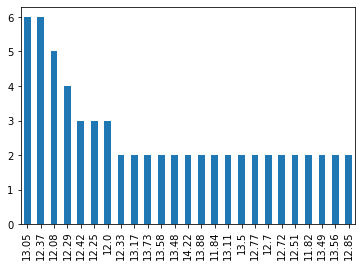

In [ ]:
data['alcohol'].value_counts().head(25).plot.bar()

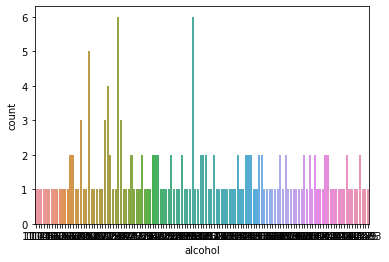

In [ ]:
sns.countplot(x='alcohol', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


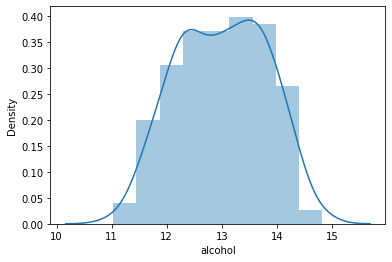

In [ ]:
sns.distplot(data['alcohol'])

O Countplot é um gráfico em formato de barra, onde “x” é o atributo escolhido, e “y” é a quantidade de vezes que esse atributo aparece.

Text(0.5, 1.0, 'As 30 medidas mais frequentes do atributo Alcohol')

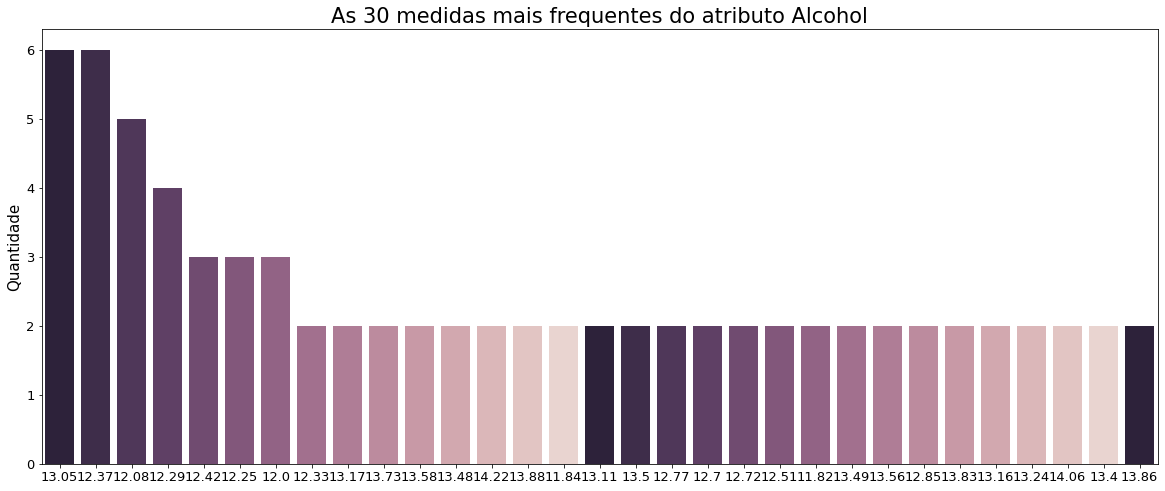

In [ ]:
palette_genre_cubehelix = sns.cubehelix_palette(15,reverse=True)
fig = plt.figure(figsize=(20,8))
sns.countplot(x=data['alcohol'], order = data['alcohol'].value_counts().index ,palette=palette_genre_cubehelix,data=data)
plt.xlim(-0.5,30.5)
plt.xlabel('')
plt.ylabel('Quantidade',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('As 30 medidas mais frequentes do atributo Alcohol',fontsize=21)

Analisando o gráfico podemos perceber que existe uma grande variedade do teor alcoólico percentual do vinho.





São classificados e denominados vinhos nobres, aqueles elaborados no território nacional exclusivamente a partir de uvas da espécie Vitis vinifera que apresentarem teor alcoólico de 14,1% (quatorze e um décimo por cento) a 16% (dezesseis por cento), em volume.
Fonte: https://www.in.gov.br/materia/-/asset_publisher/Kujrw0TZC2Mb/content/id/5809096/do1-2018-03-09-instrucao-normativa-n-14-de-8-de-fevereiro-de-2018-5809092

In [ ]:
conditions = [
    (data['alcohol'] >= 14.1),
    (data['alcohol'] <=8.6 )
]
avaliacao = ['Vinho Nobre', 'Vinho leve']
data['avaliacao'] = np.select(conditions, avaliacao, default='média')
data.avaliacao.value_counts()

média          159
Vinho Nobre     19
Name: avaliacao, dtype: int64

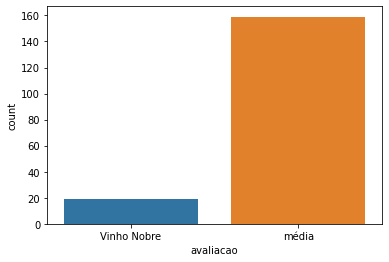

In [ ]:
sns.countplot(x=data['avaliacao'], data=data)

Calculando a média aritmética

In [ ]:
df["alcohol"].mean()

13.000617977528083

In [ ]:
ALCOHOL = df["alcohol"]

In [ ]:
ALCOHOL.mean()

13.000617977528083

Média geométrica

In [ ]:
gmean(ALCOHOL)

12.975278352602606

Média Harmônica

In [ ]:
hmean(ALCOHOL)

12.949820740397149

Mediana

In [ ]:
ALCOHOL.median()

13.05

Moda

In [ ]:
ALCOHOL.mode()

0    12.37
1    13.05
dtype: float64

*Variância*

In [ ]:
ALCOHOL.var()

0.6590623278105763

Desvio padrão

In [ ]:
ALCOHOL.std()

0.8118265380058577

Valor máximo

In [ ]:
ALCOHOL.max()

14.83

Valor mínimo

In [ ]:
ALCOHOL.min()

11.03

MEDIDAS DE ASSIMETRIA

Função para calcular estatísticas

In [ ]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

In [ ]:
so = df["alcohol"]

In [ ]:
calcula_estatisticas(so)

Media: 13.0
Moda: 13.05
Mediana: 12.37
Variância: 0.66
Desvio Padrão: 0.81
Coeficiente Person: -0.05
Coeficiente de Kurtosi: -0.86


Como nesse caso a média, a moda e a mediana tem valores bem próximos, temos uma  Distribuição  quase Simétrica.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


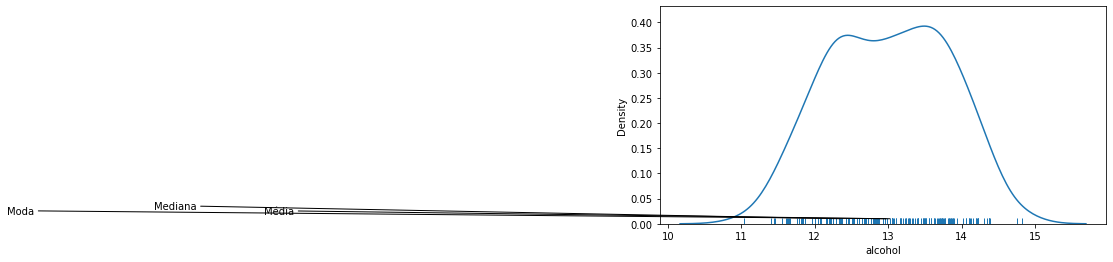

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax = sns.distplot(so,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(13.05,0.01), xytext=(1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(12.37, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(13.0, 0.01), xytext=(4.5, 0.02),arrowprops={'arrowstyle': '-'})
plt.show()


Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

Correlação entre diferentes recursos usando o mapa de correlação

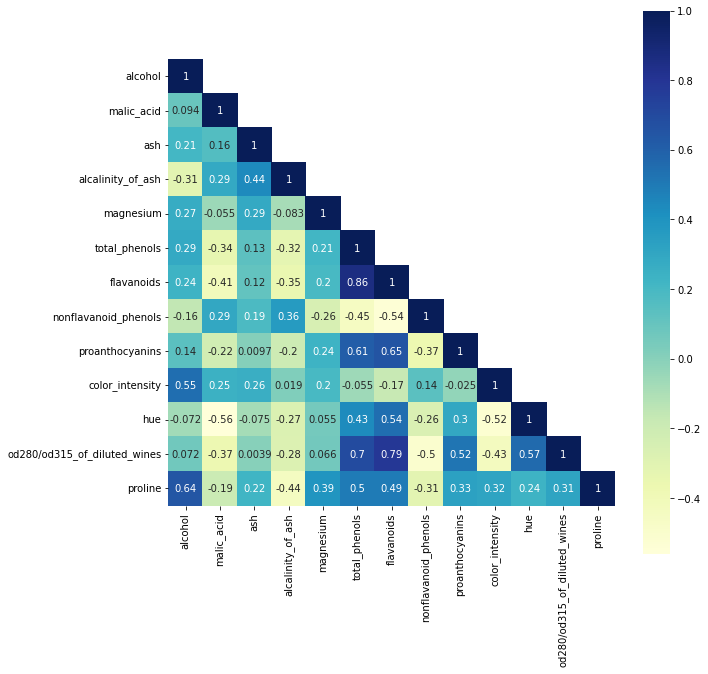

In [ ]:
correlation= data.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap="YlGnBu")

In [ ]:
correlation['alcohol'].sort_values(ascending=False)

alcohol                         1.000000
proline                         0.643720
color_intensity                 0.546364
total_phenols                   0.289101
magnesium                       0.270798
flavanoids                      0.236815
ash                             0.211545
proanthocyanins                 0.136698
malic_acid                      0.094397
od280/od315_of_diluted_wines    0.072343
hue                            -0.071747
nonflavanoid_phenols           -0.155929
alcalinity_of_ash              -0.310235
Name: alcohol, dtype: float64

Como diferentes variáveis ​​(fatores) estão afetando o teor de álcool nos vinhos?

Fatores que mais afetam: Proline, Flavanoids, od280/od315_of_diluted_wines .
Fatores que afetam menos: malic_acid, alcalinity_of_ash .

##**Aprendendo sobre o atributo** ***ash***

A ash (cinza) corresponde ao teor de matéria inorgânica dos vinhos onde o teor mínimo exigido pela legislação é de 1,5 g/L.
Fonte: https://www.upf.br/_uploads/Conteudo/simposio-sial-anais/2013/ciencia/c054.pdf

Transformando os dados para o formato numérico

In [ ]:
df['ash']=pd.to_numeric(df['ash'],errors='coerce')

In [ ]:
data.ash.value_counts().sort_index()

1.36    1
1.70    2
1.71    1
1.75    1
1.82    1
       ..
2.86    1
2.87    1
2.92    1
3.22    1
3.23    1
Name: ash, Length: 79, dtype: int64

Gráfico de barras do atributo ash das 25 primeiras amostras

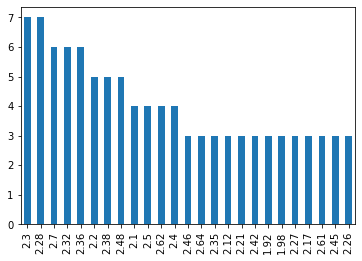

In [ ]:
data['ash'].value_counts().head(25).plot.bar()

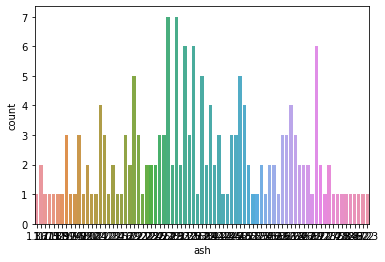

In [ ]:
sns.countplot(x='ash', data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


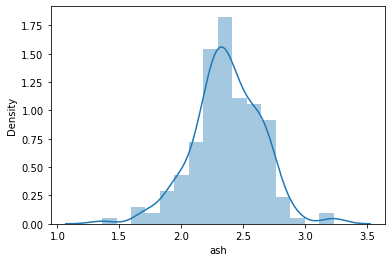

In [ ]:
sns.distplot(data['ash'])

O Countplot é um gráfico em formato de barra, onde “x” é o atributo escolhido, e “y” é a quantidade de vezes que esse atributo aparece.

Text(0.5, 1.0, 'As 30 medidas mais frequentes do atributo ash')

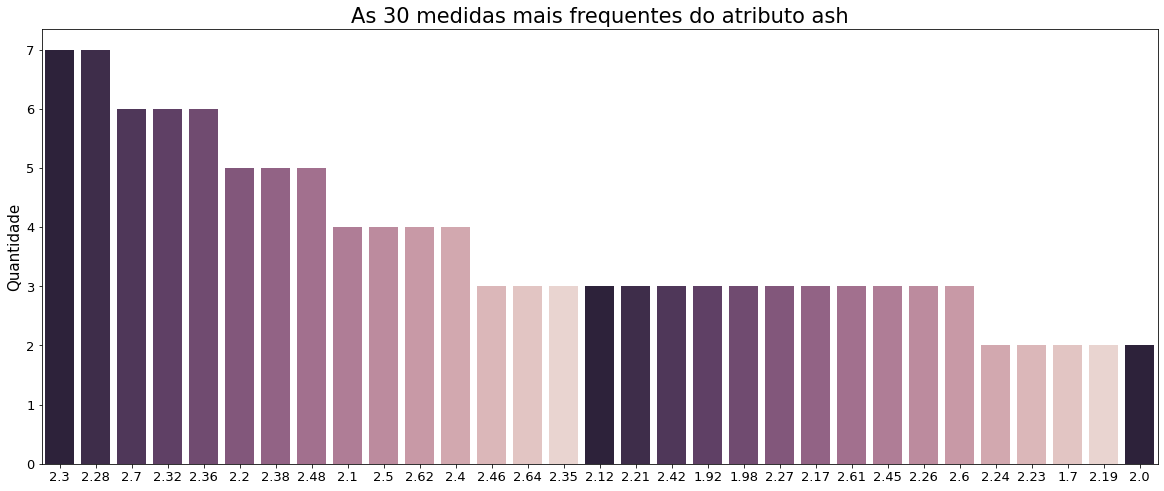

In [ ]:
palette_genre_cubehelix = sns.cubehelix_palette(15,reverse=True)
fig = plt.figure(figsize=(20,8))
sns.countplot(x=data['ash'], order = data['ash'].value_counts().index ,palette=palette_genre_cubehelix,data=data)
plt.xlim(-0.5,30.5)
plt.xlabel('')
plt.ylabel('Quantidade',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('As 30 medidas mais frequentes do atributo ash',fontsize=21)

In [ ]:
conditions = [
    (data['ash'] >= 1.5),
    (data['ash'] < 1.5 )
]
avaliacao = ['Está de acordo com a legislação brasileira', 'Não Cumpre a exigência da legislação brasileira']
data['avaliacao'] = np.select(conditions,avaliacao)
data.avaliacao.value_counts()

Está de acordo com a legislação brasileira         177
Não Cumpre a exigência da legislação brasileira      1
Name: avaliacao, dtype: int64

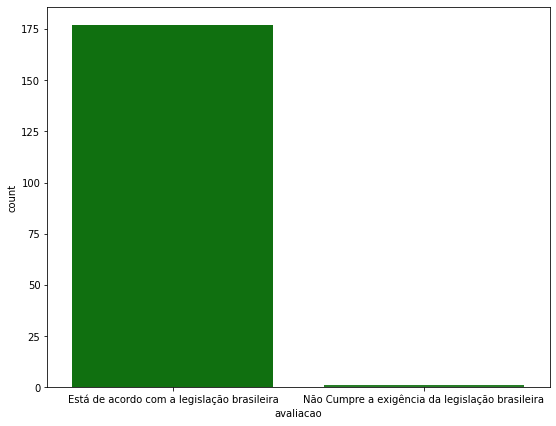

In [ ]:
palette_platform = sns.light_palette("green",10,reverse=True)
fig = plt.figure(figsize=(9,7))
sns.countplot(x=data['avaliacao'],palette=palette_platform, data=data)

Calculando a média aritmética

In [ ]:
df["ash"].mean()

2.3665168539325854

In [ ]:
ASH = df["ash"]

In [ ]:
ASH.mean()

2.3665168539325854

Média geométrica

In [ ]:
gmean(ASH)

2.350060781213164

Média Harmônica

In [ ]:
hmean(ASH)

2.332686800149835

Mediana

In [ ]:
ASH.median()

2.36

Moda

In [ ]:
ASH.mode()

0    2.28
1    2.30
dtype: float64

*Variância*

In [ ]:
ASH.var()

0.07526463530756043

Desvio padrão

In [ ]:
ASH.std()

0.2743440090608148

Valor máximo

In [ ]:
ASH.max()

3.23

Valor mínimo

In [ ]:
ASH.min()

1.36

MEDIDAS DE ASSIMETRIA

Função para calcular estatísticas

In [ ]:
def calcula_estatisticas(data):
  mean = round(np.mean(data),2)
  mode = round(stats.mode(data,)[0][0],2)
  median = round(np.median(data),2)
  var = round(np.var(data),2)
  std = round(np.std(data),2)
  coef_pearson = round(stats.skew(data),2)
  coef_kurtosis = round(kurtosis(data),2)
  msg = print("Media: {}\nModa: {}\nMediana: {}\nVariância: {}\nDesvio Padrão: {}\nCoeficiente Person: {}\nCoeficiente de Kurtosi: {}".format(mean,median,mode,var,std,coef_pearson,coef_kurtosis))
  return msg

In [ ]:
s1 = df["ash"]

In [ ]:
calcula_estatisticas(s1)

Media: 2.37
Moda: 2.36
Mediana: 2.28
Variância: 0.07
Desvio Padrão: 0.27
Coeficiente Person: -0.18
Coeficiente de Kurtosi: 1.08


Como nesse caso a média, a moda e a mediana tem valores bem próximos, temos uma  Distribuição  quase Simétrica.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


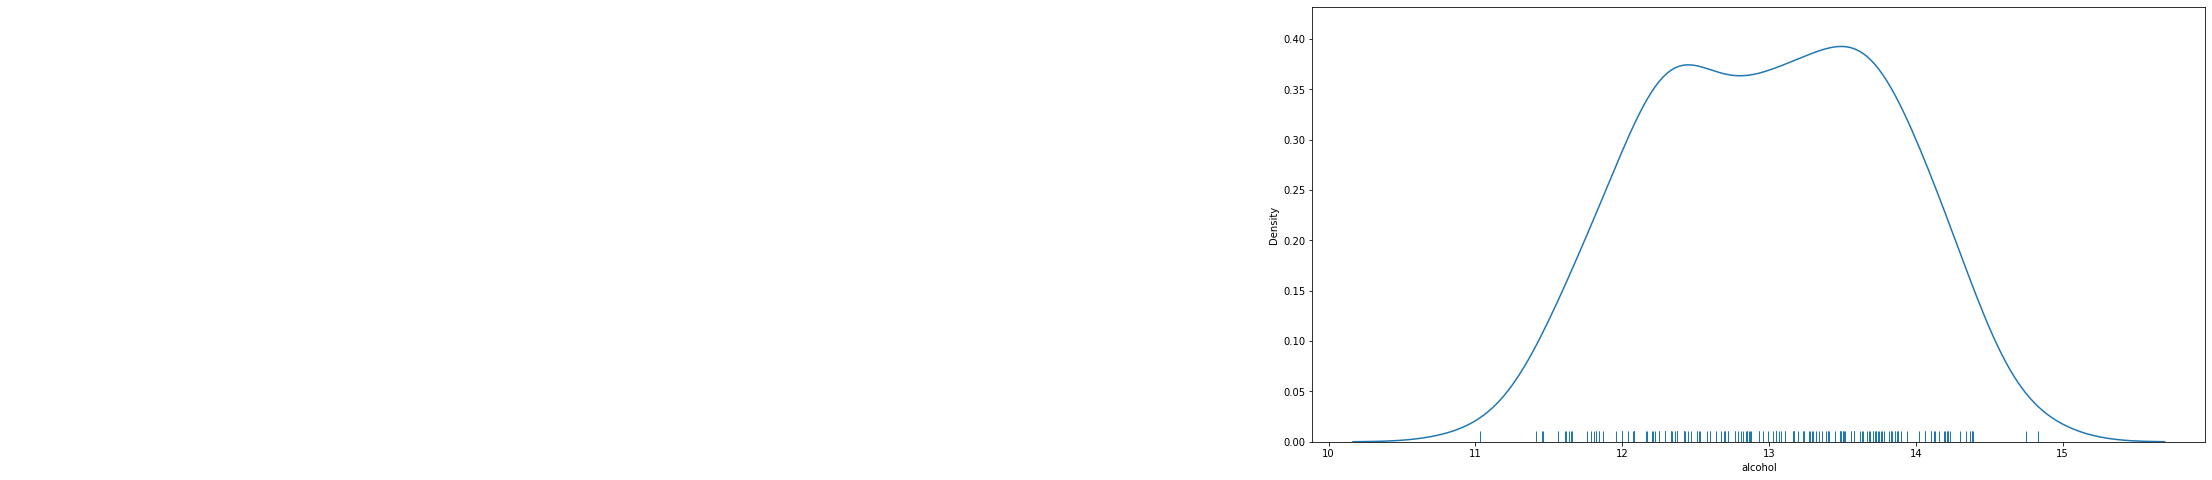

In [ ]:
fig = plt.figure(figsize=(16, 8))
ax = sns.distplot(so,rug=True,kde=True,hist=False)

ax.annotate('Moda', xy=(2.36,0.01), xytext=(1, 0.02),arrowprops={'arrowstyle': '-'})         
ax.annotate('Mediana', xy=(2.28, 0.01), xytext=(3, 0.03),arrowprops={'arrowstyle': '-'})
ax.annotate('Média', xy=(2.37, 0.01), xytext=(4.5, 0.02),arrowprops={'arrowstyle': '-'})
plt.show()


Coeficiente de Pearson - O valor é próximo de zero a distribuição é simétrica.

Coeficiente de Curtose - O valor é menor que 3 o grau de achatamento da distribuição normal é platicúrtica (mais achatada no platô)

In [ ]:
correlation['ash'].sort_values(ascending=False)

ash                             1.000000
alcalinity_of_ash               0.443367
magnesium                       0.286587
color_intensity                 0.258887
proline                         0.223626
alcohol                         0.211545
nonflavanoid_phenols            0.186230
malic_acid                      0.164045
total_phenols                   0.128980
flavanoids                      0.115077
proanthocyanins                 0.009652
od280/od315_of_diluted_wines    0.003911
hue                            -0.074667
Name: ash, dtype: float64

**Observando os resultados acima, podemos concluir que o teor alcoólico é o atributo de maior importância durante a análise**

